## Start

In [5]:
from IPython.display import clear_output
from fastbook import *
from fastai.vision.all import *
import fastbook
fastbook.setup_book()


matplotlib.rc('image', cmap='Greys')

We can share code here:
### https://github.com/mmichelli/CV_2_Fast_AI

In [6]:
# Get Data
path = Path('./understanding_cloud_organization')
images = Path(path/'train_images')
train_CSV = path/'train.csv'

### Load data

In [7]:
# Prep DataFrame
train = pd.read_csv(train_CSV)
# Transform the csv file to Image name and label
train['Image_name'] = train['Image_Label'].apply(lambda x: x.split('_')[0])
train['Label_name'] = train['Image_Label'].apply(lambda x: x.split('_')[1])
train.drop('Image_Label', axis=1, inplace=True)
train = train.pivot('Image_name', 'Label_name', 'EncodedPixels')

In [8]:
train.head()

Label_name,Fish,Flower,Gravel,Sugar
Image_name,,,,
0011165.jpg,264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 277518 937 278918 937 280318 937 281718 937 283118 937 284518 937 285918 937 287318 937 288718 937 290118 937 291518 937 292918 937 294318 937 295718 937 297118 937 298518 937 299918 937 301318 937 302718 937 304118 937 305518 937 306918 937 308318 937 309718 937 311118 937 312518 937 313918 937 315318 937 316718 937 318118 937 319518 937 320918 937 322318 937 323718 937 325118 937 326518 937 327918 937 329318 937 330718 937 332118 937 333518 937 334918 937 336318 937 337718 937 339118 937 34...,1355565 1002 1356965 1002 1358365 1002 1359765 1002 1361165 1002 1362565 1002 1363965 1002 1365365 1002 1366765 1002 1368165 1002 1369565 1002 1370965 1002 1372365 1002 1373765 1002 1375165 1002 1376565 1002 1377965 1002 1379365 1002 1380765 1002 1382165 1002 1383565 1002 1384965 1002 1386365 1002 1387765 1002 1389165 1002 1390565 1002 1391965 1002 1393365 1002 1394765 1002 1396165 1002 1397565 1002 1398965 1002 1400365 1002 1401765 1002 1403165 1002 1404565 1002 1405965 1002 1407365 1002 1408765 1002 1410165 1002 1411565 1002 1412965 1002 1414365 1002 1415765 1002 1417165 1002 1418565 100...,NaN,NaN
002be4f.jpg,233813 878 235213 878 236613 878 238010 881 239410 881 240810 881 242210 881 243610 881 245010 881 246410 881 247810 881 249210 881 250610 881 252010 881 253410 881 254810 881 256210 881 257610 881 259010 881 260410 881 261810 881 263210 881 264610 881 266010 881 267410 881 268810 881 270210 881 271610 881 273010 881 274410 881 275810 881 277210 881 278610 881 280010 881 281410 881 282810 881 284210 881 285610 881 287010 881 288410 881 289810 881 291210 881 292610 881 294010 881 295410 881 296810 881 298210 881 299610 881 301010 881 302410 881 303810 881 305210 881 306610 881 308010 881 30...,1339279 519 1340679 519 1342079 519 1343479 519 1344879 519 1346279 519 1347679 519 1349079 519 1350479 519 1351879 519 1353279 519 1354679 519 1356079 519 1357479 519 1358879 519 1360279 519 1361679 519 1363079 519 1364479 519 1365879 519 1367279 519 1368679 519 1370079 519 1371479 519 1372879 519 1374279 519 1375679 519 1377079 519 1378479 519 1379879 519 1381279 519 1382679 519 1384079 519 1385479 519 1386879 519 1388279 519 1389679 519 1391079 519 1392479 519 1393879 519 1395279 519 1396679 519 1398079 519 1399479 519 1400879 519 1402279 519 1403679 519 1405079 519 1406479 519 1407879 ...,NaN,67495 350 68895 350 70295 350 71695 350 73095 350 74495 350 75895 350 77295 350 78695 350 80095 350 81495 350 82895 350 84295 350 85695 350 87095 350 88495 350 89895 350 91295 350 92695 350 94095 350 95495 350 96895 350 98295 350 99695 350 101095 350 102495 350 103895 350 105295 350 106695 350 108095 350 109495 350 110895 350 112295 350 113695 350 115095 350 116495 350 117895 350 119295 350 120695 350 122095 350 123495 350 124895 350 126295 350 127695 350 129095 350 130495 350 131895 350 133295 350 134695 350 136095 350 137495 350 138895 350 140295 350 141695 350 143095 350 144495 350 1458...
0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 10510 690 11910 690 13310 690 14710 690 16110 690 17510 690 18910 690 20310 690 21710 690 23110 690 24510 690 25910 690 27310 690 28710 690 30110 690 31510 690 32910 690 34310 690 35710 690 37110 690 38510 690 39910 690 41310 690 42710 690 44110 690 45510 690 46910 690 48310 690 49710 690 51110 690 52510 690 53910 690 55310 690 56710 690 58110 690 59510 690 60910 690 62310 690 63710 690 65110 690 66510 690 67910 690 69310 690 70710 690 72110 690 73510 690 74910 690 76310 690 77710 690 79110 690 80510 690 81910 690 83310 690 84710 690 86110 690 8...,2047 703 3447 703 4847 703 6247 703 7647 703 9047 703 10447 703 11847 703 13247 703 14647 703 16047 703 17447 703 18847 703 20247 703 21647 703 23047 703 24447 703 25847 703 27247 703 28647 703 30047 703 31447 703 32847 703 34247 703 35647 703 36901 849 38301 849 39701 849 41101 849 42501 849 43901 8

In [9]:
def rleToMask(rleString,height,width):
  rows,cols = height,width
  rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
  rlePairs = np.array(rleNumbers).reshape(-1,2)
  img = np.zeros(rows*cols,dtype=np.uint8)
  mask_one_dim = torch.zeros(height*width)
  for start_pixel, num_pixels in rlePairs:
    mask_one_dim[start_pixel-1: start_pixel-1 + num_pixels] = 1
  img = mask_one_dim.reshape(rows,cols).T
  return img
  

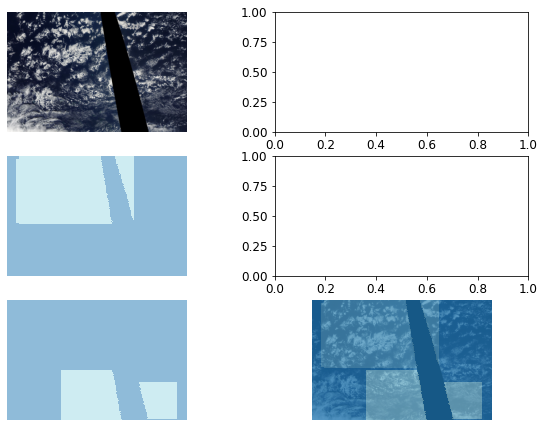

In [10]:

index = int(random.random() * 1000)
img = Image.open(images/train.index[index]) 

t_image = TensorImage(img)
h,w = img.shape
_, ax = plt.subplots(3, 2, figsize=(10, 7.5))
t_image.show(ctx=ax[0][0])
t_image.show(ctx=ax[2][1])
if pd.notna(train.loc[train.index[index]]['Fish']):
    TensorMask(rleToMask(train.loc[train.index[index]]['Fish'], w, h )).show(ctx=ax[0][1])
    TensorMask(rleToMask(train.loc[train.index[index]]['Fish'], w, h )).show(ctx=ax[2][1])
if pd.notna(train.loc[train.index[index]]['Flower']):  
    TensorMask(rleToMask(train.loc[train.index[index]]['Flower'], w, h )).show(ctx=ax[1][0])
    TensorMask(rleToMask(train.loc[train.index[index]]['Flower'], w, h )).show(ctx=ax[2][1] )
if pd.notna(train.loc[train.index[index]]['Gravel']):
    TensorMask(rleToMask(train.loc[train.index[index]]['Gravel'], w, h )).show(ctx=ax[1][1])
    TensorMask(rleToMask(train.loc[train.index[index]]['Gravel'], w, h )).show(ctx=ax[2][1] )
if pd.notna(train.loc[train.index[index]]['Sugar']):    
    TensorMask(rleToMask(train.loc[train.index[index]]['Sugar'], w, h )).show(ctx=ax[2][0])
    TensorMask(rleToMask(train.loc[train.index[index]]['Sugar'], w, h )).show(ctx=ax[2][1] )



In [11]:
def get_mask(file):
    index = file.name
    if pd.notna(train.loc[index]['Fish']):
        return TensorMask(rleToMask(train.loc[index]['Fish'], w, h )) 
    else:
        return np.zeros(w*h,dtype=np.uint8).reshape(w,h).T
def get_x(row):
    return Image.open(images/row.name) 

In [12]:
cloud_dls = SegmentationDataLoaders.from_label_func(images,images.ls(), get_mask, bs=8, codes=np.array(["Fish"]), item_tfms=Resize(125))

/opt/miniconda3/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


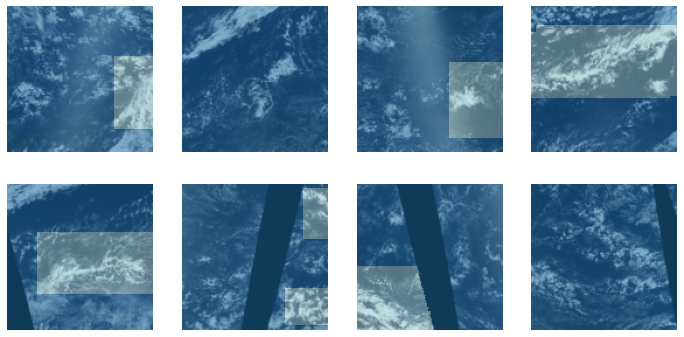

In [13]:
cloud_dls.show_batch()

In [14]:
learn =  unet_learner(cloud_dls, resnet34)

/opt/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,time


RuntimeError: cuDNN error: CUDNN_STATUS_NOT_INITIALIZED

pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: 
        cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], 
                thread: [7,0,0] Assertion `t >= 0 && t < n_classes` failed.
